# Data Science - Part 2 

In [ ]:
from locale import locale_encoding_alias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

## Higgs Dataset

In [ ]:
DATADIR = "./data_for_intro"

In [ ]:
df = pd.read_csv(os.path.join(DATADIR, "atlas-higgs-challenge-2014-v2.csv"))

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
plt.pie() # TODO

## Data Imbalance

# Census Dataset Study

## Dataset Imbalance

- Load dataset
- Try fitting Logistic Regression? What do you observe?
- Transform all categorical variables into integers. Otherwise, many ML algorithms cannot deal with them. 
- What out for the non-categorical variables. 
- Also, encode the target.
- What do you observe for the target?

In [1]:
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split


# fetch dataset 
census_income_kdd = fetch_ucirepo(id=117) 
  
# data (as pandas dataframes) 
X = census_income_kdd.data.features 
y = census_income_kdd.data.targets 
  
# metadata 
print(census_income_kdd.metadata) 
  
# variable information 
print(census_income_kdd.variables) 


{'uci_id': 117, 'name': 'Census-Income (KDD)', 'repository_url': 'https://archive.ics.uci.edu/dataset/117/census+income+kdd', 'data_url': 'https://archive.ics.uci.edu/static/public/117/data.csv', 'abstract': 'This data set contains weighted census data extracted from the 1994 and 1995 current population surveys conducted by the U.S. Census Bureau.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 299285, 'num_features': 41, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Education Level', 'Marital Status', 'Race', 'Sex', 'Other', 'Nationality', 'Income'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2000, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C5N30T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set contains weighted census data extracted from the 

In [2]:
import pandas as pd
df_features=pd.DataFrame(X)
df_targets=pd.DataFrame(y)


In [3]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df_targets['income'] = encoder.fit_transform(df_targets['income'])

df_targets.head()
class_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Display the class mapping
print(class_mapping)


{' 50000+.': np.int64(0), '-50000': np.int64(1)}


In [4]:
count_A=df_targets['income'].sum()
count_B= len(df_targets['income'])-count_A
print(f'number of people which are in class <=50k: {count_B}')
print(f'number of people which are in class >50k: {count_A}')

number of people which are in class <=50k: 12382
number of people which are in class >50k: 187141


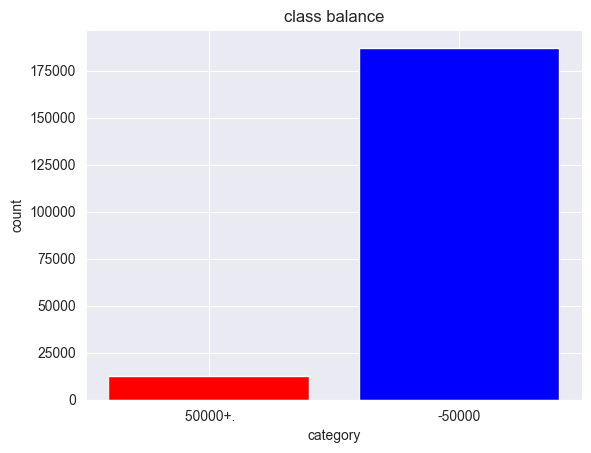

so we have class imbalance
 6% of samples are in <=50k class and 93 are in >50k class


In [6]:
# visualizing the class imbalance
import matplotlib.pyplot as plt
categories= [k for k in class_mapping]
values=[count_B, count_A]

plt.bar(categories, values,color=['red', 'blue'])
plt.title('class balance')
plt.xlabel('category')
plt.ylabel('count')
plt.show()
print('so we have class imbalance')
percentage= count_B/len(df_targets['income'])*100
print(f' {int(percentage)}% of samples are in <=50k class and {int(100-percentage)} are in >50k class')

In [7]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
o_encoder= OrdinalEncoder()
l_endcoder= LabelEncoder()


In [8]:
df_features.columns

Index(['AAGE', 'ACLSWKR', 'ADTINK', 'ADTOCC', 'AHGA', 'AHSCOL', 'AMARITL',
       'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE',
       'AWKSTAT', 'CAPGAIN', 'GAPLOSS', 'DIVVAL', 'FILESTAT', 'GRINREG',
       'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWRT', 'MIGMTR1', 'MIGMTR3',
       'MIGMTR4', 'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT', 'PEFNTVTY',
       'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN',
       'WKSWORK', 'AHRSPAY', 'year'],
      dtype='object')

In [9]:
df_encoded_targets= l_endcoder.fit_transform(df_targets)

C:\Users\kashi\Desktop\Working_projects\Working_projects\NLP\pythonProject1\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
df_features=df_features.fillna(-1)
df_features=df_features.astype(str)

In [11]:
df_encoded_features= o_encoder.fit_transform(df_features)

In [12]:
''# Baseline model 

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [13]:
df_targets

,income
0,1
1,1
2,1
3,1
4,1
...,...
199518,1
199519,1
199520,1
199521,1


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test= train_test_split(df_encoded_features, df_encoded_targets, random_state=42,shuffle=True, test_size=0.2)
model= LogisticRegression()

model.fit(X_train,y_train)
model_2= KNeighborsClassifier(2)
model_2.fit(X_train,y_train)

C:\Users\kashi\Desktop\Working_projects\Working_projects\NLP\pythonProject1\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier(n_neighbors=2)

In [15]:
y_preds= model.predict(X_test)
y_preds_2=model_2.predict(X_test)

In [16]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, balanced_accuracy_score

In [17]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, balanced_accuracy_score
acc= accuracy_score(y_test, y_preds_2)
prec=precision_score(y_test, y_preds_2)
recall=recall_score(y_test, y_preds_2)
f1=f1_score(y_test, y_preds_2)
matrix_2=confusion_matrix(y_test, y_preds_2)
balanced_acc= balanced_accuracy_score(y_test, y_preds_2)

In [18]:
print(f'The accuracy score of the model: {acc}')
print(f'The precision score of the model: {prec}')
print(f'The recall score of the model: {recall}')
print(f'The f1 score of the model: {f1}')
print(f'The balanced accuracy score score of the model: {balanced_acc}')

The accuracy score of the model: 0.8709434907906277
The precision score of the model: 0.9566381910964504
The recall score of the model: 0.9037903204325707
The f1 score of the model: 0.92946364981099
The balanced accuracy score score of the model: 0.6263236106819924


In [19]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, balanced_accuracy_score
acc= accuracy_score(y_test, y_preds)
prec=precision_score(y_test, y_preds)
recall=recall_score(y_test, y_preds)
f1=f1_score(y_test, y_preds)
matrix=confusion_matrix(y_test, y_preds)
balanced_acc= balanced_accuracy_score(y_test, y_preds)

In [20]:
print(f'The accuracy score of the model: {acc}')
print(f'The precision score of the model: {prec}')
print(f'The recall score of the model: {recall}')
print(f'The f1 score of the model: {f1}')
print(f'The balanced accuracy score score of the model: {balanced_acc}')

The accuracy score of the model: 0.9381531136449066
The precision score of the model: 0.9454420766554062
The recall score of the model: 0.9914764403484005
The f1 score of the model: 0.9679122136412097
The balanced accuracy score score of the model: 0.5410388128922359


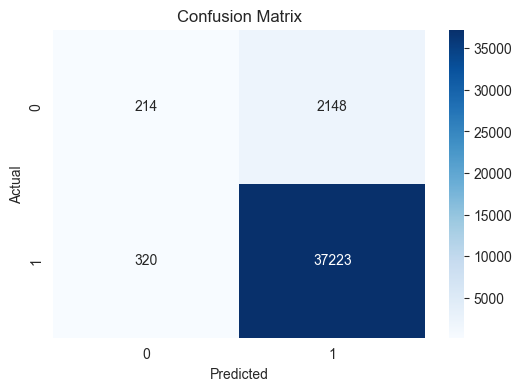

In [21]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


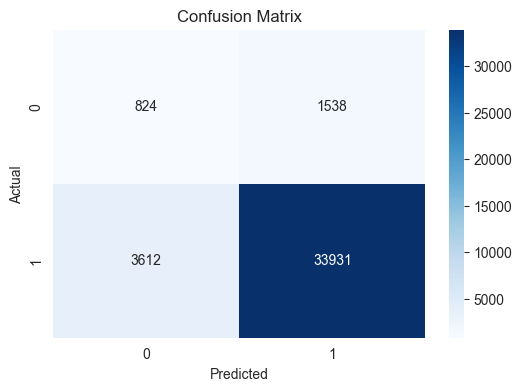

In [22]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_2, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Case Study Balancing

### Oversampling
Links: 
- https://imbalanced-learn.org/stable/auto_examples/over-sampling/plot_comparison_over_sampling.html#sphx-glr-auto-examples-over-sampling-plot-comparison-over-sampling-py
- https://imbalanced-learn.org/stable/common_pitfalls.html

 homework: use boot strapping as well

In [ ]:
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split


# fetch dataset 
census_income_kdd = fetch_ucirepo(id=117) 
  
# data (as pandas dataframes) 
X = census_income_kdd.data.features 
y = census_income_kdd.data.targets 
  
# metadata 
print(census_income_kdd.metadata) 
  
# variable information 
print(census_income_kdd.variables) 


In [ ]:
import pandas as pd
df_features=pd.DataFrame(X)
df_targets=pd.DataFrame(y)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df_encoded_targets = encoder.fit_transform(df_targets['income'])

df_targets.head()
class_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Display the class mapping
print(class_mapping)


In [ ]:
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

In [ ]:
count_A=df_encoded_targets.sum()
count_B= len(df_encoded_targets)-count_A
print(f'number of people which are in class >50k: {count_B}')
print(f'number of people which are in class <=50k: {count_A}')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
o_encoder= OrdinalEncoder()
l_endcoder= LabelEncoder()


In [ ]:
df_features=df_features.fillna(-1)
df_features=df_features.astype(str)

In [ ]:
df_encoded_features= o_encoder.fit_transform(df_features)

In [ ]:
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
adasyn=ADASYN()
df_encoded_features, df_encoded_targets=adasyn.fit_resample(df_encoded_features, df_encoded_targets)

### ADASYN

In [ ]:
count_A=df_encoded_targets.sum()
count_B= len(df_encoded_targets)-count_A
print(f'number of people which are in class >50k: {count_B}')
print(f'number of people which are in class <=50k: {count_A}')

In [ ]:
# visualizing the class imbalance
import matplotlib.pyplot as plt
categories= [k for k in class_mapping]
values=[count_B, count_A]

plt.bar(categories, values,color=['red', 'blue'])
plt.title('class balance')
plt.xlabel('category')
plt.ylabel('count')
plt.show()
print('so we have class imbalance')
percentage= count_B/len(df_targets['income'])*100
print(f' {int(percentage)}% of samples are in <=50k class and {int(100-percentage)} are in >50k class')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test= train_test_split(df_encoded_features, df_encoded_targets, random_state=42,shuffle=True, test_size=0.2)
model= LogisticRegression()

model.fit(X_train,y_train)


In [ ]:


from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, balanced_accuracy_score
y_preds= model.predict(X_test)

acc= accuracy_score(y_test, y_preds)
prec=precision_score(y_test, y_preds)
recall=recall_score(y_test, y_preds)
f1=f1_score(y_test, y_preds)
matrix=confusion_matrix(y_test, y_preds)
balanced_acc= balanced_accuracy_score(y_test, y_preds)
print(f'The accuracy score of the model: {acc}')
print(f'The precision score of the model: {prec}')
print(f'The recall score of the model: {recall}')
print(f'The f1 score of the model: {f1}')
print(f'The balanced accuracy score score of the model: {balanced_acc}')

In [ ]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_2, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
